In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
train_data = pd.read_csv('https://raw.githubusercontent.com/vamsivarma/datasets/master/machine_learning/linear_regression/train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/vamsivarma/datasets/master/machine_learning/linear_regression/test.csv')

display(train_data.head())

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,6.800000,0.037490,48.6034,2004,291.6204,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,15.600000,0.172597,114.8518,1997,2163.1842,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2,12.911575,0.054721,107.8254,1985,2387.5588,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,11.800000,0.098312,81.4618,1998,161.1236,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,17.850000,0.046600,125.1388,2004,1981.4208,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0


In [ ]:
X_train = train_data.drop(columns=['Item_Outlet_Sales'],axis=1)
y_train = train_data['Item_Outlet_Sales']

display(X_train.head())
display(y_train.head())

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,6.800000,0.037490,48.6034,2004,0,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
1,15.600000,0.172597,114.8518,1997,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2,12.911575,0.054721,107.8254,1985,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,11.800000,0.098312,81.4618,1998,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,17.850000,0.046600,125.1388,2004,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0


0     291.6204
1    2163.1842
2    2387.5588
3     161.1236
4    1981.4208
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
X_test = test_data.drop('Item_Outlet_Sales', axis = 1)
y_test = test_data['Item_Outlet_Sales']

display(X_test.head())
display(y_test.head())

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,18.100,0.022526,95.0094,2007,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,6.615,0.093575,199.4426,2002,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,11.850,0.050187,164.1526,2002,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,13.500,0.159969,147.6102,1999,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
4,14.000,0.029769,145.4786,1999,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0


0    1713.7692
1    3361.6242
2    3124.5994
3    1603.9122
4    1300.3074
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
predictions_lr = lr.predict(X_test)

print(len(predictions_lr))
print(len(y_test))

341
341


In [ ]:
mae = np.mean(np.abs(predictions_lr - y_test))

print('min price',y_train.min())
print('max price',y_train.max())
print('mae',mae)


min price 33.29
max price 13086.9648
mae 751.6342314382968


In [ ]:
df_pred = pd.DataFrame({'expecting':predictions_lr,
                        'actual':y_test, 
                        '|err|':np.abs(predictions_lr - y_test),
                        '|% err|':(np.abs(predictions_lr - y_test) / y_test)*100
                        })
big_err_pred =df_pred[df_pred['|% err|']> 25]

big_err_pred.sort_values(by='|% err|',ascending=False, inplace=True)

display(big_err_pred.head(5))


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,expecting,actual,|err|,|% err|
235,-1045.535202,48.6034,1094.138602,2251.156508
270,-771.302347,55.2614,826.563747,1495.734359
170,-1075.858148,113.1860,1189.044148,1050.522280
42,-926.229667,111.8544,1038.084067,928.067261
272,-967.335761,122.5072,1089.842961,889.615435


In [ ]:
from sklearn.svm import SVR
# svr = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)
svr = SVR(kernel="linear", C=100, gamma="auto")
# svr = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train,y_train)

SVR(C=100, gamma='auto', kernel='linear')

In [ ]:
predictions_svr = svr.predict(X_test)

print(len(predictions_svr))
print(len(y_test))

341
341


In [ ]:
mae = np.mean(np.abs(predictions_svr-y_test))

print('min price',y_train.min())
print('max price',y_train.max())
print('mae',mae)

min price 33.29
max price 13086.9648
mae 729.1746841084681


In [ ]:
df_pred_svr = pd.DataFrame({'expecting':predictions_svr,
                        'actual':y_test, 
                        '|err|':np.abs(predictions_svr - y_test),
                        '|% err|':(np.abs(predictions_svr - y_test) / y_test)*100
                        })
big_err_pred_srv =df_pred_svr[df_pred_svr['|% err|']> 25]

big_err_pred_srv.sort_values(by='|% err|',ascending=False, inplace=True)

display(big_err_pred_srv.head(5))

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,expecting,actual,|err|,|% err|
235,-802.590641,48.6034,851.194041,1751.305549
270,-739.072980,55.2614,794.334380,1437.412697
170,-700.972621,113.1860,814.158621,719.310357
83,1827.874242,225.7062,1602.168042,709.846713
272,-675.313092,122.5072,797.820292,651.243594


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor()
rfc.fit(X_train,y_train)


RandomForestRegressor()

In [ ]:
predictions_rfc = rfc.predict(X_test)

print(len(predictions_rfc))
print(len(y_test))

341
341


In [ ]:
mae = np.mean(np.abs(predictions_rfc - y_test))

print('min price',y_train.min())
print('max price',y_train.max())
print('mae',mae)

min price 33.29
max price 13086.9648
mae 758.9086350381228


In [ ]:
df_pred_rfc = pd.DataFrame({'expecting':predictions_rfc,
                        'actual':y_test, 
                        '|err|':np.abs(predictions_rfc - y_test),
                        '|% err|':(np.abs(predictions_rfc - y_test) / y_test)*100
                        })
big_err_pred_rfc =df_pred_rfc[df_pred_rfc['|% err|']> 25]

big_err_pred_rfc.sort_values(by='|% err|',ascending=False, inplace=True)

display(big_err_pred_rfc.head(5))

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,expecting,actual,|err|,|% err|
258,3489.664198,593.2278,2896.436398,488.250281
282,1694.247944,325.5762,1368.671744,420.384458
310,1785.382648,353.5398,1431.842848,405.001883
131,825.745134,171.7764,653.968734,380.709302
105,1331.167230,299.6100,1031.557230,344.300000


In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv'

df = pd.read_csv(data_url)

print('failure rate on total devices',len(df[df['Machine failure']==1])/len(df)*100,'%')

display(df.describe())


failure rate on total devices 3.39 %


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
df.Type = df.Type.apply(lambda x: 'Low' if (x == 'L') else 'Medium' if(x =='M') else 'High')

df.rename(columns={'Type':'Quality','TWF':'tool wear failure','HDF':'heat dissipation failure','PWF':'power failure','OSF':'overstrain failure','RNF':'random failures'},inplace=True)

df['Air temperature [K]']=df['Air temperature [K]'].apply(lambda x: x -273.15)
df['Process temperature [K]']=df['Process temperature [K]'].apply(lambda x: x -273.15)

df.rename(columns={'Air temperature [K]':'Air temp.','Process temperature [K]':'Process temp.'},inplace=True)


df.head()

,UDI,Product ID,Quality,Air temp.,Process temp.,Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,tool wear failure,heat dissipation failure,power failure,overstrain failure,random failures
0,1,M14860,Medium,24.95,35.45,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,Low,25.05,35.55,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,Low,24.95,35.35,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,Low,25.05,35.45,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,Low,25.05,35.55,1408,40.0,9,0,0,0,0,0,0


In [ ]:
features = df.drop(list(df)[8:], axis=1)
features = df.drop(list(df)[:2], axis=1)
features = pd.get_dummies(features)
display(features.head(),all)

labels = df.drop(list(df)[:8], axis=1)

display(labels.head())


,Air temp.,Process temp.,Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,tool wear failure,heat dissipation failure,power failure,overstrain failure,random failures,Quality_High,Quality_Low,Quality_Medium
0,24.95,35.45,1551,42.8,0,0,0,0,0,0,0,0,0,1
1,25.05,35.55,1408,46.3,3,0,0,0,0,0,0,0,1,0
2,24.95,35.35,1498,49.4,5,0,0,0,0,0,0,0,1,0
3,25.05,35.45,1433,39.5,7,0,0,0,0,0,0,0,1,0
4,25.05,35.55,1408,40.0,9,0,0,0,0,0,0,0,1,0


<function all>

,Machine failure,tool wear failure,heat dissipation failure,power failure,overstrain failure,random failures
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [ ]:
labels = df.drop(list(df)[:8], axis=1)
labels['out'] = labels[labels.columns[:]].apply(
    lambda x: ''.join(x.dropna().astype(str)),
    axis=1
)


In [ ]:
classes = labels['out'].unique()
print(classes)
print(len(classes))


['000000' '100100' '100110' '110000' '100010' '000001' '100000' '101000'
 '110001' '101100' '101010' '110010' '110110']
13


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels['out'], test_size=0.2, random_state=1)

print(type(X_train))
display(X_train.head())

display(y_train.head())

display(y_test.head())


<class 'pandas.core.frame.DataFrame'>


,Air temp.,Process temp.,Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,tool wear failure,heat dissipation failure,power failure,overstrain failure,random failures,Quality_High,Quality_Low,Quality_Medium
2694,26.95,36.45,1625,38.0,46,0,0,0,0,0,0,0,0,1
5140,31.15,40.45,1585,32.1,202,0,0,0,0,0,0,0,0,1
2568,26.45,36.05,1450,43.1,160,0,0,0,0,0,0,0,1,0
3671,29.15,38.55,1486,39.6,147,0,0,0,0,0,0,0,0,1
7427,26.85,38.25,1634,31.9,0,0,0,0,0,0,0,0,1,0


2694    000000
5140    000000
2568    000000
3671    000000
7427    000000
Name: out, dtype: object

9953    000000
3850    000000
4962    000000
3886    000000
5437    000000
Name: out, dtype: object

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
predictions = model.predict(X_test)
print(len(predictions))
print(len(y_test))

out = pd.DataFrame(y_test)

out.rename(columns={'out':'expected'},inplace=True)
out['predicted'] = predictions

out.head()

2000
2000


,expected,predicted
9953,000000,000000
3850,000000,000000
4962,000000,000000
3886,000000,000000
5437,000000,000000


In [ ]:

errors = out[out['expected']!=out['predicted']]

print(len(errors))
display(errors.head())

df.iloc[3611]

1


,expected,predicted
3611,110001,110000


UDI                           3612
Product ID                  L50791
Quality                        Low
Air temp.                    28.55
Process temp.                37.75
Rotational speed [rpm]        1405
Torque [Nm]                   46.4
Tool wear [min]                207
Machine failure                  1
tool wear failure                1
heat dissipation failure         0
power failure                    0
overstrain failure               0
random failures                  1
Name: 3611, dtype: object

In [ ]:
import tensorflow.keras as K
(X_train, y_train), (X_test, y_test) = K.datasets.mnist.load_data()

print(X_train.shape)



(60000, 28, 28)


In [ ]:
X_train = X_train / 255
X_test = X_test / 255

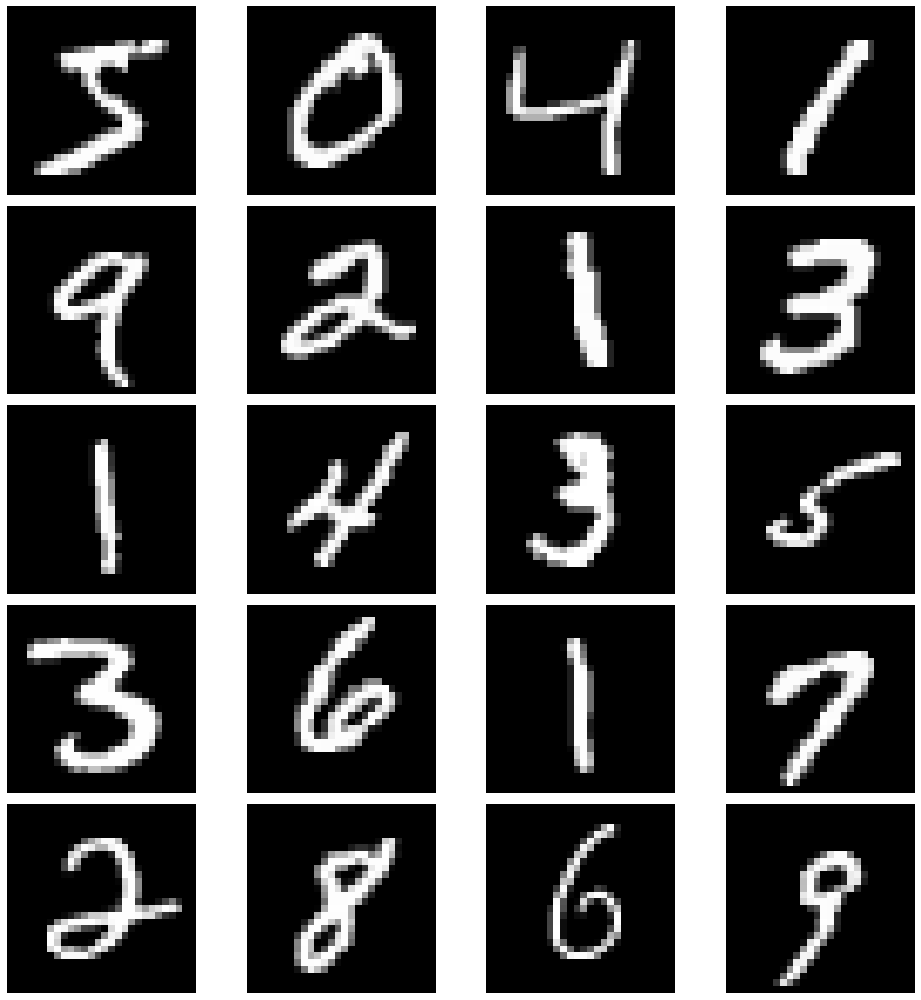

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 14))

columns = 4
rows = 5

total_pics = columns*rows

for i in range(total_pics):
  if(i <total_pics):
    ax = fig.add_subplot(rows, columns, i+1)

  plt.imshow(X_train[i],cmap='gray')
  plt.axis('off')
plt.tight_layout()

In [ ]:
# print(len(X_train))
X_train = X_train.reshape(len(X_train),28*28)
print(X_train.shape)

(60000, 784)


In [ ]:
X_test = X_test.reshape(len(X_test),28*28)
print(X_test.shape)

(10000, 784)


In [ ]:
model = RandomForestClassifier()
model.fit(X_train,y_train)


RandomForestClassifier()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
df = pd.DataFrame({
    "actual":y_test,
    "expected":predictions
})

df.head()

,actual,expected
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [ ]:
corrects = df[df['expected']==df['actual']]

corrects.head()

,actual,expected
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [70]:
errors = df[df['expected']!=df['actual']]
display(errors.head())

print('dataframe accuracy:',1 -len(errors)/len(df))


,actual,expected
92,9,4
124,7,4
241,9,8
247,4,2
259,6,0


dataframe accuracy: 0.9701


In [ ]:
print('accuracy from model eval:',model.score(X_test,y_test))

accuracy from model eval: 0.9701


In [68]:

columns = 4
rows = 5

total_pics = columns*rows

error_index = np.array(errors[:total_pics].index)
print(error_index)



[ 92 124 241 247 259 320 321 381 403 445 447 448 449 479 495 543 578 582
 591 613]


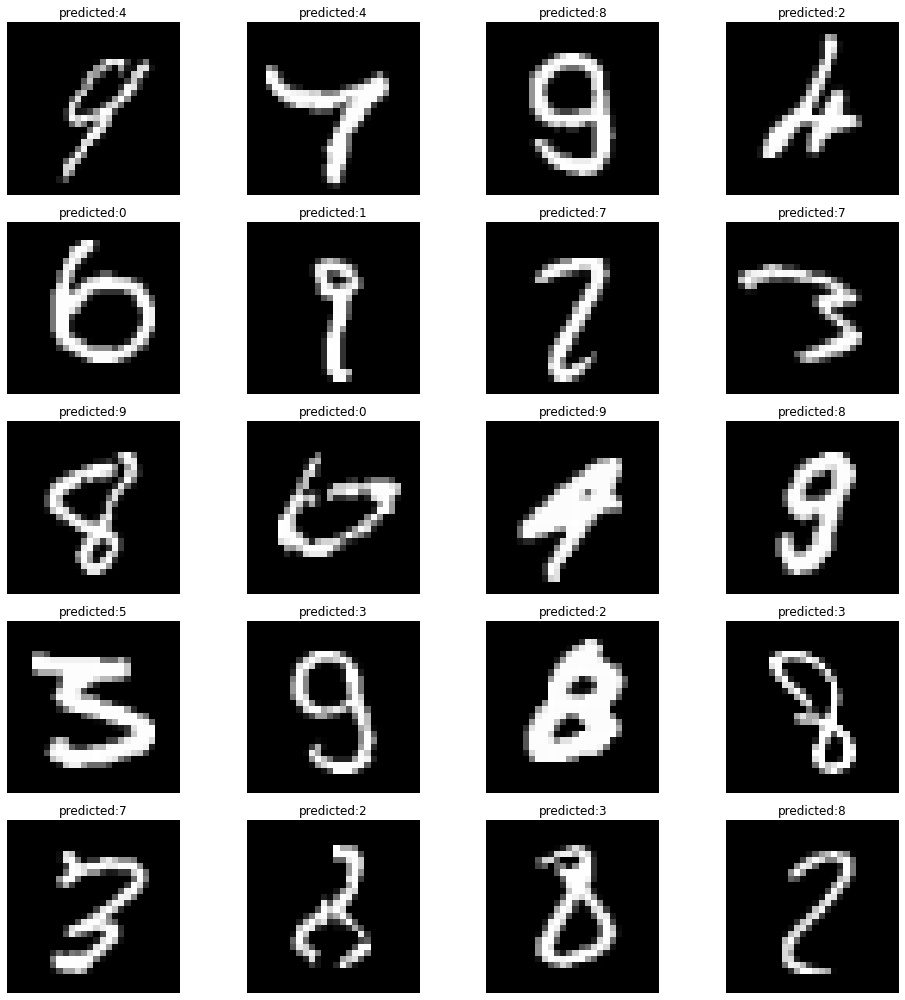

In [78]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 14))


for i in range(total_pics):
  if(i <total_pics):
    ax = fig.add_subplot(rows, columns, i+1)

  ax.set_title("predicted:"+str(df.iloc[error_index[i]]['expected']))
  plt.imshow(X_test[error_index[i]].reshape(28,28),cmap='gray')
  plt.axis('off')
plt.tight_layout()

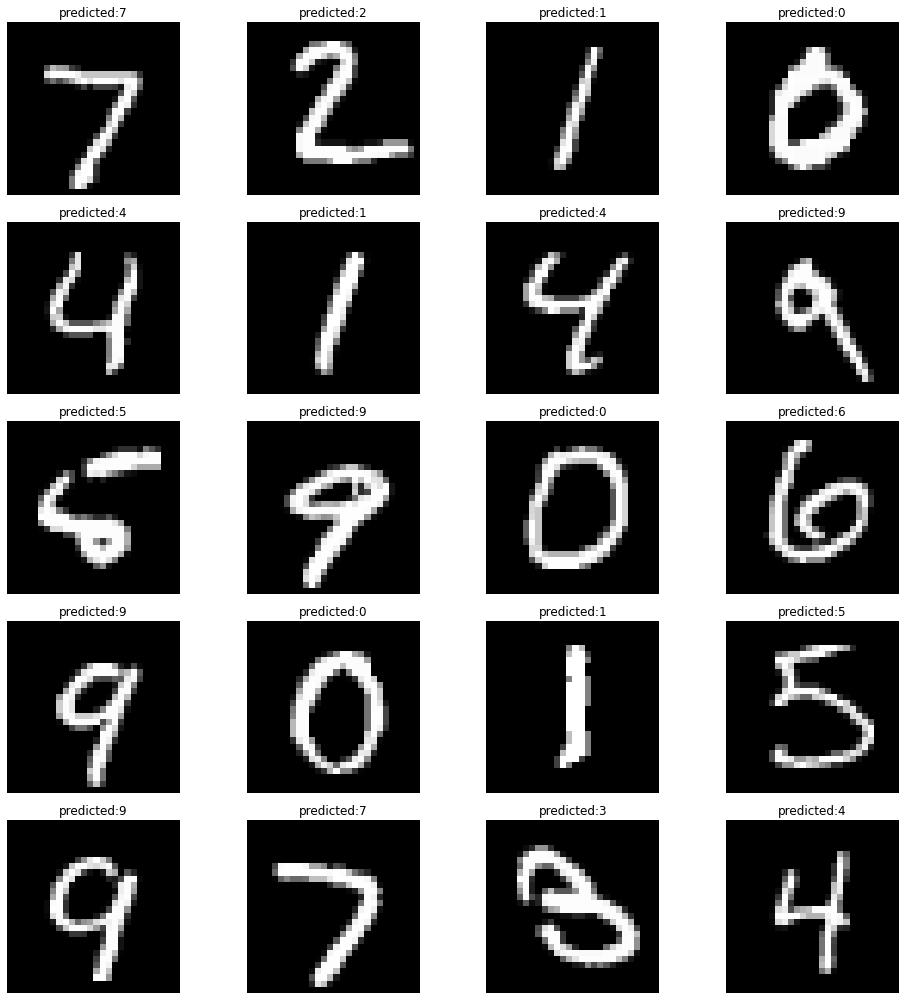

In [80]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 14))


correct_index = np.array(corrects[:total_pics].index)

for i in range(total_pics):
  if(i <total_pics):
    ax = fig.add_subplot(rows, columns, i+1)

  ax.set_title("predicted:"+str(df.iloc[correct_index[i]]['expected']))
  plt.imshow(X_test[correct_index[i]].reshape(28,28),cmap='gray')
  plt.axis('off')
plt.tight_layout()